<a href="https://colab.research.google.com/github/Settodestridor/IA-aplica-EQ/blob/main/IA_ppgeq_01_introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprendizagem de Máquina**



Aprendizagem de máquina é “o campo de estudo que dá aos computadores a habilidade de aprender sem terem sido diretamente programados” (Arthur Samuel, 1959) -> **Informação a partir de dados!**

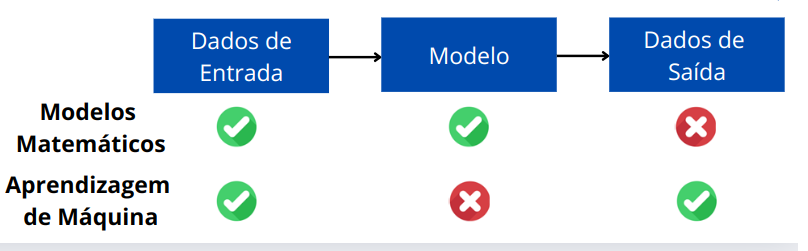



**Categorias de Aprendizagem de Máquina**

1) *Aprendizagem Supervisionada*: Relacionam informações de entrada e saída com base em dados rotulados (valores numéricos ou classes);

2) *Aprendizagem Não-supervisionada*: Busca de padrões em dados não-rotulados;

3) *Aprendizagem por Reforço*: Treinamento com base em recompensa/punição.


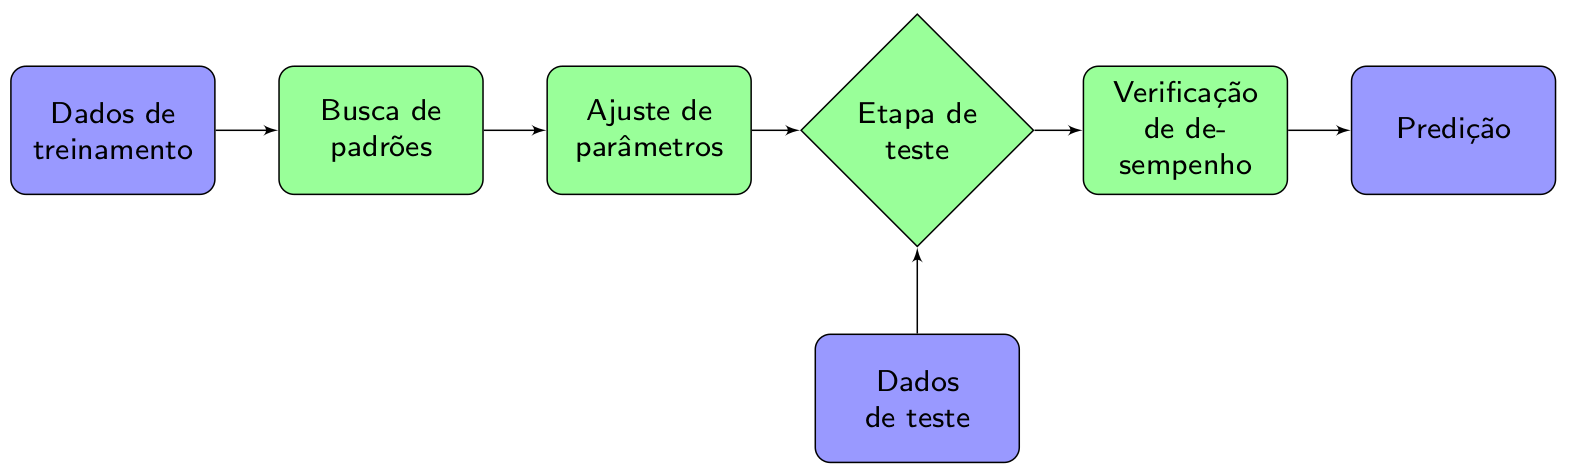

 **Aprendizagem Supervisionada:**

Algoritmos divididos em duas categorias:

*Classificação*: Algoritmos usados para prever a classe de uma amostra (valores discretos) com base em atributos (*feature*) conhecidos. Exemplos: Sistemas de recomendação, reconhecimento de padrões em imagens, detecção de falhas, análise de sentimentos, etc.

*Regressão*: Algoritmos usados para prever conjuntos de valores de saída (valores contínuos) com base em atributos conhecidos. Exemplos: Previsão de valores, previsão de eficiência de processos, previsão de vendas, etc.


 **Aprendizagem Não-Supervisionada:**

Principais categorias:

*Clustering* (Agrupamento): Técnicas utilizadas para definir grupos similares dentro de um conjunto de dados não-rotulados. Exemplos: agrupamento de imagens, segmentação espacial em sensoriamento remoto (identificação de vegetações, etc.), divisão de usuários de uma rede em grupos, etc.

*Redução de Dimensionalidade* : Processos de projeção de dados em alta dimensão em espaços de dimensão reduzida. Muito utilizados como etapas intermediárias em outras tarefas para facilitar o processamento dos dados.

# Representação de Dados

- Os algoritmos de aprendizagem de máquina necessitam que os dados sejam representados de forma **numérica** (seja contínua ou discreta);

- Quando os dados estão em formato **não-numérico**, é necessário aplicar um processo de **codificação** (*encoding*) para convertê-los em vetores;

- Os vetores gerados podem ou não reter características dos dados originais. Quando existe alguma forma de retenção, o processo costuma ser chamado de **embedding** (*incorporação*):

  a) Encoding: Processo geral de transformação de dados não-numéricos em um formato adequado para processamento;

  b) Embedding: técnicas de mapeamento de dados complexos (vídeos, textos, etc.) em vetores que capturam o significado dos dados e a relação entre eles.

Os termos são muitas vezes usados como sinônimos, mas usualmente *embedding* é usado para descrever um dado codificado que mantém alguma estrutura fundamental dos dados originais.

# Encoding



- Inicialmente, vamos considerar dados **categóricos**, que são aqueles onde uma amostra pode pertecer a um conjunto finito de *categorias*;

- Os dados categóricos podem ser do tipo **nominal** (quando não existe uma ordem, p. ex.: cor, localização, nomes, etc.) ou **ordinal** (quando existe uma ordem, p. ex.: tamanho, grau de escolaridade, etc.).

##Exemplo

Considere um conjunto de dados contendo informações de cor, peso e tipo de frutas. Estes dados podem ser usados para treinar um algoritmo de classificação que irá prever qual o tipo de fruta (dado de saída) com base na cor e no peso (atributos de entrada)


In [ ]:
import pandas as pd #Importando a biblioteca pandas (manipulação de dados)

url = 'https://drive.google.com/uc?id=1qY07_AktYdbVd4bdgQzoWgz2zURRihRj' #link para o arquivo de dados no Google Drive

df = pd.read_csv(url) #Lendo o arquivo com dados e alocando na variável 'df' (DataFrame)
#print(df) #Imprimindo o DataFrame para visualização
df.head(8) #Imprime as primeiras linhas com uma formatação melhor

,Color,Weight,Fruit
0,Red,176.055567,Apple
1,Yellow,136.975682,Pear
2,Green,129.092192,Pear
3,Yellow,136.766429,Pear
4,Red,197.856507,Apple
5,Green,119.454057,Pear
6,Brown,108.204822,Kiwi
7,Green,126.094893,Pear


Este arquivo possui quatro colunas:

  1- ID (identificador da amostra);

  2- Cor (atributo de entrada, variável categórica nominal);

  3- Peso (atributo de entrada, variável numérica contínua);

  4- Tipo de fruta (dado de saída, variável categórica nominal).

## Estratégias de Codificação

###1) Label Encoding

Estratégia mais simples, consiste em atribuir um valor numérico pré-definido para cada categoria.
 Exemplo:

- Vermelho = 0

- Amarelo = 1

- Verde = 2

- Marrom = 3

In [ ]:
#Utilizando o Label Encoder do Scikit-Learn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_le = df.copy() #Cria uma cópia do DataFrame 'df', sem alterar o original

df_le['Color_num'] = le.fit_transform(df_le['Color']) #Cria uma nova coluna 'Color_num' com valores numéricos com base na categoria da coluna 'Color'
#Obs: A ordem das classes é definida por ordem alfabética
df_le.head(7)


,Color,Weight,Fruit,Color_num
0,Red,176.055567,Apple,2
1,Yellow,136.975682,Pear,3
2,Green,129.092192,Pear,1
3,Yellow,136.766429,Pear,3
4,Red,197.856507,Apple,2
5,Green,119.454057,Pear,1
6,Brown,108.204822,Kiwi,0


**Prós**

1) Simples implementação;

2) Não aumenta o número de atributos.


**Cons**

1) Implica em uma *ordem* inerente nos dados;

2) Estabelece uma *distância* entre as categorias.

Esta estratégia costuma ser adequada para variáveis nominais, mas para variáveis ordinais pode gerar sérios problemas!!

###2) Ordinal Encoding

Essencialmente idêntico ao Label, porém, permite definir uma ordem para as categorias.

In [ ]:

#Utilizando o Ordinal Encoder do Scikit-Learn
from sklearn.preprocessing import OrdinalEncoder
ordem = ['Green', 'Yellow', 'Red', 'Brown'] #Ordem definida para as categorias
ord = OrdinalEncoder(categories = [ordem])

df_ord = df.copy() #Cria uma cópia do DataFrame 'df', sem alterar o original

df_ord[['Color_ord']] = ord.fit_transform(df_ord[['Color']]) #Criando uma coluna "Color_ord" a partir da codificação da coluna "Color", usando a ordem definida

df_ord.head(7)

,Color,Weight,Fruit,Color_ord
0,Red,176.055567,Apple,2.0
1,Yellow,136.975682,Pear,1.0
2,Green,129.092192,Pear,0.0
3,Yellow,136.766429,Pear,1.0
4,Red,197.856507,Apple,2.0
5,Green,119.454057,Pear,0.0
6,Brown,108.204822,Kiwi,3.0


Prós

1) Não aumenta o número de atributos;

2) Estabelece uma ordem prédefinida para os valores.

Cons


1) Válida somente para dados ordinais;

2) Assume uma distância fixa entre os níveis.

###3) One-Hot Encoding

Nesta abordagem, é criado um novo atributo para cada categoria diferente presente nos dados.

No exemplo das frutas, temos 4 categorias de cores (vermelho, amarelo, verde e marrom). Assim, são criados 4 novos atributos.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False).set_output(transform='pandas')
#set_output = pandas já converte os dados para um formato de DataFramde do Pandas
#sparse_output é preciso definir como False quando a função anterior é utilizada

df_ohe = df.copy()

oh_encoded = ohe.fit_transform(df_ohe[['Color']]) #Cria os atributos com base nas categorias e armazena em um novo DataFrame
#oh_encoded.head()

df_ode = pd.concat([df_ohe, oh_encoded], axis=1).drop(columns = ['Color']) #Concatena os DataFrames e remove a coluna Color
df_ode.head(7)

#Um resultado semelhante pode ser obtido usando a função get_dummies do Pandas:
#df_oh_pds = pd.get_dummies(df_oh, columns=['Color'], dtype=float)
#print(df_oh_pds)



,Weight,Fruit,Color_Brown,Color_Green,Color_Red,Color_Yellow
0,176.055567,Apple,0.0,0.0,1.0,0.0
1,136.975682,Pear,0.0,0.0,0.0,1.0
2,129.092192,Pear,0.0,1.0,0.0,0.0
3,136.766429,Pear,0.0,0.0,0.0,1.0
4,197.856507,Apple,0.0,0.0,1.0,0.0
5,119.454057,Pear,0.0,1.0,0.0,0.0
6,108.204822,Kiwi,1.0,0.0,0.0,0.0


**Prós**

1) Adequado para varíaveis categóricas nominais;

2) Pode ser usado em conjunto com métodos de redução de dimensionalidade;


**Cons:**

1) Cria um grande número de novos atributos, aumentando a dimensionalidade do problema;

2) Pode levar a matrizes esparsas (com grande quantidades de valores nulos), o que pode gerar problemas em alguns métodos;

3) Gera multicolinearidade entre os atributos criados, sendo que um deles pode ser previsto com base nos outros (isto pode ser eliminado removendo uma das colunas)

## Dados Faltantes (Missing Values)

É comum que conjuntos de dados extensos possuam alguns valores faltando para um ou mais atributos. De modo geral, é preciso que todos os atributos tenham um valor associado para que os algoritmos possam ser aplicados. No caso de dados faltantes, existem três possibilidades:

  1) Excluir as amostras com dados faltantes: válido para conjuntos de dados grandes e com poucas amostras com dados faltantes;

  2) Excluir o atributo com dados faltantes de todas as amostras: válido quando a maior parte das amostras não possui esse valor definido e quando é esperado que ele não possua uma influência muito significativa;

  3) Atribuir algum valor para os dados faltantes, baseado em uma análise estatística (usar a média, mediana, moda, etc) ou em alguma espécie de previsão (modelos matemáticos, regressão com base nos outros atributos, etc.).

**Exemplo: Titanic Dataset**



Conjunto de dados com informações sobre passageiros do Titanic e se sobrevireram ao acidente ou não.

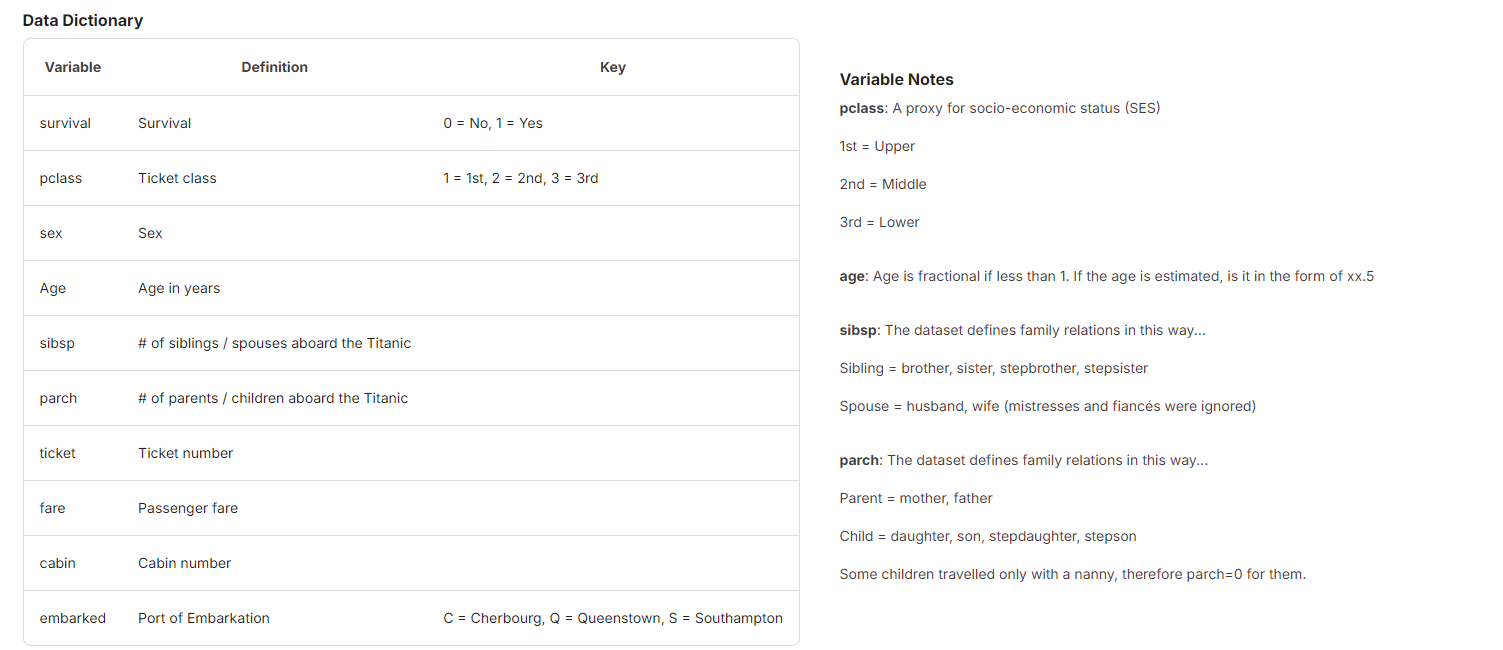

In [ ]:
url2 = 'https://drive.google.com/uc?id=1XghaVbEccXI1fC4mJPbaEBaRv2ovLy0S'

titanic_df = pd.read_csv(url2)
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Para verificar se existem dados faltantes, podemos checar as informações do DataFrame
titanic_df.info()

#Como pode ser visto, existem 891 entradas e os atributos 'Age', 'Cabin' e 'Embarked' possuem menos de 891 valores não-nulos, logo, possuem dados faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


###1) Removendo amostras com dados faltantes

Primeiro, podemos ver que para a o atributo 'Embarked', existe somente duas amostras com dados falantes. Nesse caso, é coerente supor que remover estas duas amostras seja a melhor opção.


In [ ]:
#Podemos usar a função dropna do Pandas para remover amostras com valores faltantes (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

titanic_df.dropna(subset=['Embarked'], inplace=True)
#subset aplica a seleção somente a coluna desejada
#inplace = True modifica o DataFrame original
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


###2) Removendo atributos não-significativos

Para o atributo 'Cabin', somente 204 das 891 amostras possuem valor atribuído. Neste caso, podemos remover este atributo dos dados já que existe pouco informação para tentar prever um valor para as demais amostras.

In [ ]:
#Usando a função drop do Pandas para remover a coluna:
titanic_df.drop('Cabin', axis=1, inplace=True);
#axis = 1 indica que é coluna e não linha
#Obs.: Se for executado mais de uma vez, irá dar erro porque a coluna 'Cabin' não irá mais existir!
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


###3) Estimando valores para os dados faltantes

Por último, temos a coluna de idades com 714 dos 891 presentes. Para os demais, podemos fazer uma estimativa dos valores faltantes.

In [ ]:
#Usando a função SimpleImputer do sklearn para atribuir valor para os dados faltantes
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy = 'mean')
#usando a estratégia de média: calcula o valor médio dos demais dados e atribui este valor para os faltantes

titanic_df['Age'] = imp_mean.fit_transform(titanic_df[['Age']]) #substitui os dados faltantes na coluna com a média
titanic_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.642093,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C


In [ ]:
#Verificando se não existem mais dados faltantes
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Embedding

O termo *Embedding* é usado para descrever o processo de transformação de dados complexo, usualmente em alta dimensão, em representações numéricas simplificadas que armazenam a maioria das informações relevantes dos dados originais.



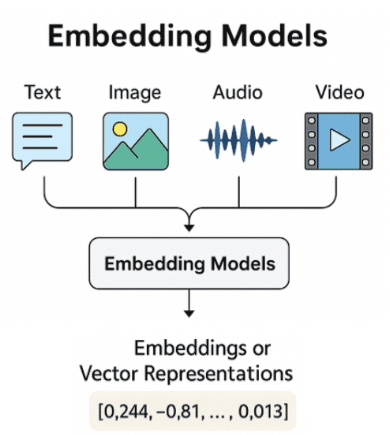

Exemplos de aplicações de algoritmos de embedding:

- **Processamento de Textos:**  Usados em Processamento de Linguagem Natural (NLP) para representar palavras como vetores. Parte de uma representação *one-hot* para as palavras (ou *tokens*) como entrada (vetores de alta dimensão) e gera vetores com menor dimensão que guardam o significado semântico das palavras. Exemplos de algoritmos: BERT, Word2Vec, GPT, etc.

- **Processamento de Imagens:** Convertem representação visual em vetores que codificam informações presentes na imagem (relações espaciais, formas, etc.). Normalmente baseados em redes neurais convolucionais (CNN) ou transformers. Exemplos: CLIP (pares imagem-texto),



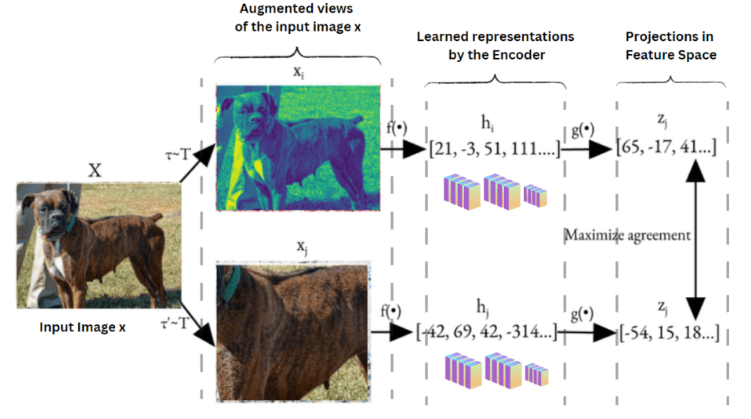

- **Processamento de Audio:** Usados para gerar vetores que capturam características de ondas sonoras, como questões fonéticas (reconhecimento de voz), linguísticas (reconhecimento de fala), acústicas (processamento de músicas), etc.

- **Processamento de Vídeos**: Modelos que capturam tanto informação espacial (como processamento de imagem) quanto temporal (mudança de cena, ações, etc.).

**Modelos Mutlimodais**: Nos últimos anos, tem-se aumentado o uso de modelos *multimodais*, que são aqueles capazes de gerar *embeddings* a partir de diferentes tipos de dados, como por exemplo textos, imagens, audio, etc.

Exemplos: pareamento de imagens e texto (descrição de imagens), ferramentas de busca cruzada (ex, encontrar músicas com base em uma descrição), etc.  

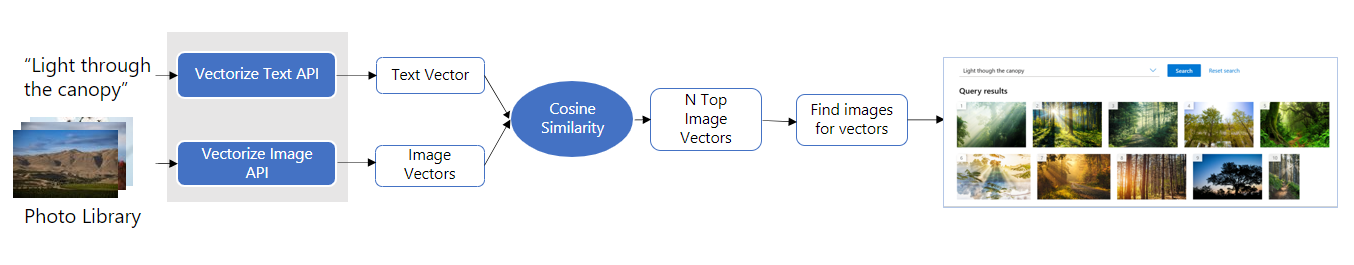